<h1 align="center">Project1 : Customer Churn Prediction Model</h1>

<h3> Customer Churn Prediction Using Artificial Neural Network (ANN)
Customer churn prediction is to measure why customers are leaving a business. In this tutorial we will be looking at customer churn in telecom  business. We will build a deep learning model to predict the churn and use precision,recall, f1-score to measure performance of our mode</h3>l

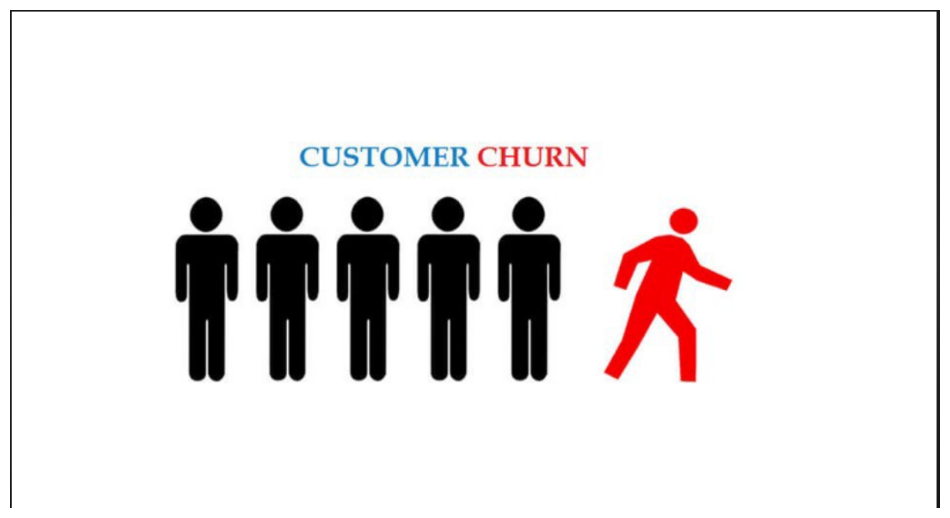

In [1289]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

image_path = '1.png'  

img = mpimg.imread(image_path)

plt.figure(figsize=(12, 12)) 

plt.imshow(img)
plt.axis('off')
plt.show()


In [1298]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [1300]:
df=pd.read_csv("customer_churn.csv")

In [1302]:
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
492,0388-EOPEX,Female,0,Yes,No,2,Yes,No,Fiber optic,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,74.40,139.4,Yes
3400,5950-AAAGJ,Male,0,No,No,18,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,No,Bank transfer (automatic),84.30,1537.9,No
6501,4753-PADAS,Female,0,Yes,No,67,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Bank transfer (automatic),105.70,6816.95,No
1220,0872-JCPIB,Male,0,No,No,17,Yes,Yes,DSL,Yes,...,No,No,No,Yes,Month-to-month,No,Bank transfer (automatic),65.75,1111.2,No
730,6439-GTPCA,Female,0,No,No,45,Yes,Yes,Fiber optic,No,...,Yes,Yes,No,No,Month-to-month,Yes,Electronic check,87.25,3941.7,Yes


<h1 align="center">1-Data Cleaning </h1>

In [1305]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [1307]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [1309]:
df.shape

(7043, 21)

In [1311]:
df[df.TotalCharges==' '].shape

(11, 21)

In [1313]:
df=df[df.TotalCharges!=' ']

In [1315]:
df.shape

(7032, 21)

In [1318]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 
 17  

In [1320]:
df1=df

<h1 align="center">Visualization of Customers Churns</h1>

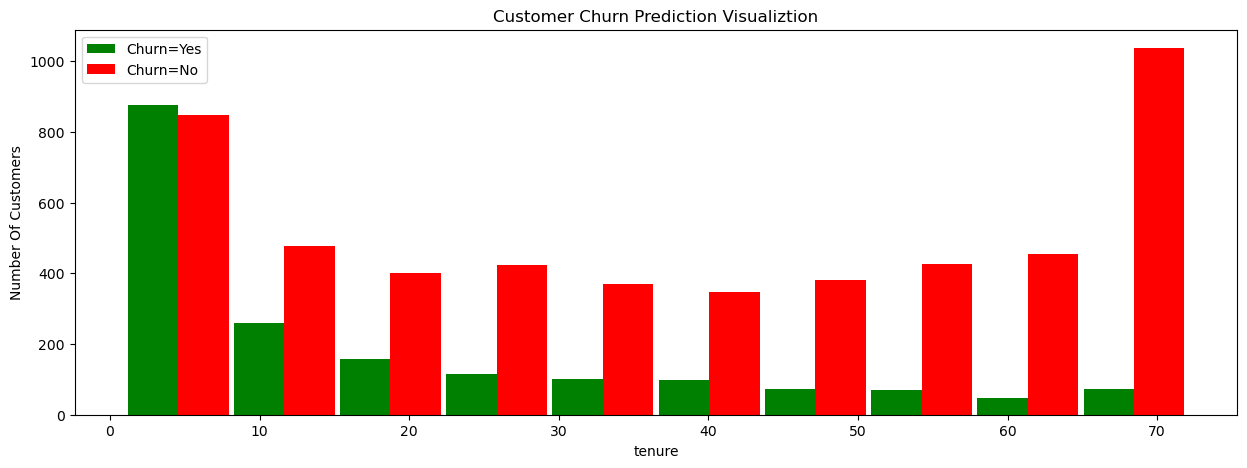

In [1323]:
tenure_churn_no = df1[df1.Churn=='No'].tenure
tenure_churn_yes = df1[df1.Churn=='Yes'].tenure
plt.figure(figsize=(15,5))

plt.xlabel("tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

blood_sugar_men = [113, 85, 90, 150, 149, 88, 93, 115, 135, 80, 77, 82, 129]
blood_sugar_women = [67, 98, 89, 120, 133, 150, 84, 69, 89, 79, 120, 112, 100]

plt.hist([tenure_churn_yes, tenure_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

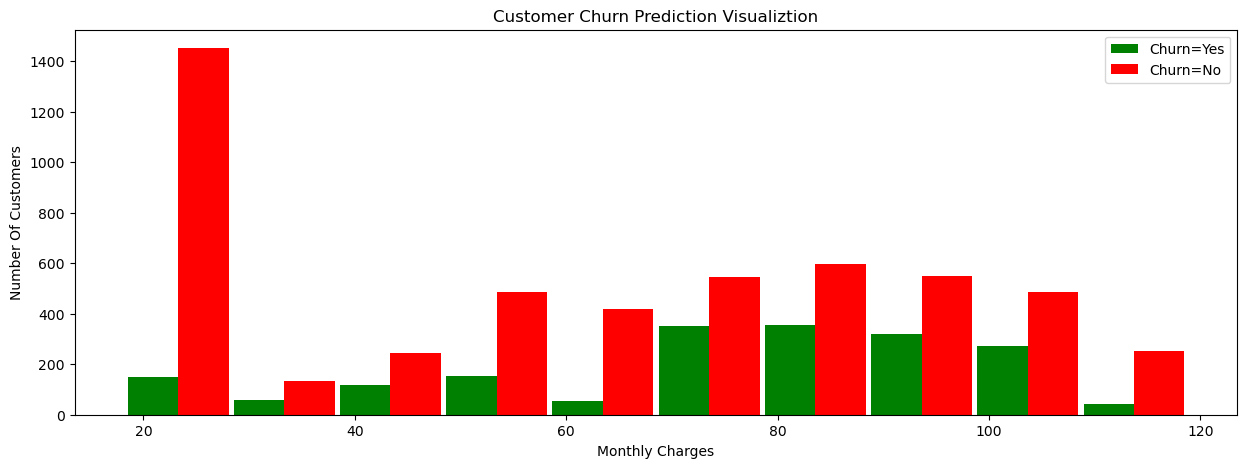

In [1325]:
mc_churn_no = df1[df1.Churn=='No'].MonthlyCharges      
mc_churn_yes = df1[df1.Churn=='Yes'].MonthlyCharges      
plt.figure(figsize=(15,5))
plt.xlabel("Monthly Charges")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

blood_sugar_men = [113, 85, 90, 150, 149, 88, 93, 115, 135, 80, 77, 82, 129]
blood_sugar_women = [67, 98, 89, 120, 133, 150, 84, 69, 89, 79, 120, 112, 100]

plt.hist([mc_churn_yes, mc_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

In [1327]:
def print_unique_col_values(df):
       for column in df:
            if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}') 

In [1330]:
df1.replace('No internet service','No',inplace=True)
df1.replace('No phone service','No',inplace=True)

In [1333]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 
 17  

In [1335]:
print_unique_col_values(df1)

customerID: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
TotalCharges: ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Churn: ['No' 'Yes']


In [1338]:
cols=["Partner","Dependents","PhoneService","MultipleLines","OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies"
      ,"PaperlessBilling","Churn"]
for col in cols:
    df1[col].replace({'Yes':1,'No':0},inplace=True)

C:\Users\FAST LAPTOP\AppData\Local\Temp\ipykernel_17336\123869091.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1[col].replace({'Yes':1,'No':0},inplace=True)
C:\Users\FAST LAPTOP\AppData\Local\Temp\ipykernel_17336\123869091.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1[col].replace

In [1340]:
print_unique_col_values(df1)

customerID: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender: ['Female' 'Male']
InternetService: ['DSL' 'Fiber optic' 'No']
Contract: ['Month-to-month' 'One year' 'Two year']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
TotalCharges: ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']


In [1342]:
df1.gender.replace({'Female':0,'Male':1}, inplace=True)

C:\Users\FAST LAPTOP\AppData\Local\Temp\ipykernel_17336\3060539953.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1.gender.replace({'Female':0,'Male':1}, inplace=True)
C:\Users\FAST LAPTOP\AppData\Local\Temp\ipykernel_17336\3060539953.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1.ge

In [1344]:
df.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,0,DSL,0,...,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,0,DSL,1,...,1,0,0,0,One year,0,Mailed check,56.95,1889.5,0


In [1346]:
df1.drop("customerID",axis=1,inplace=True)

In [1348]:
df1.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [1350]:
df1.MonthlyCharges

0        29.85
1        56.95
2        53.85
3        42.30
4        70.70
         ...  
7038     84.80
7039    103.20
7040     29.60
7041     74.40
7042    105.65
Name: MonthlyCharges, Length: 7032, dtype: float64

In [1353]:
df1.shape

(7032, 20)

<h1 align="center">Scaling for More Model Precision</h1>

In [1356]:
from sklearn.preprocessing import MinMaxScaler

In [1358]:
model=MinMaxScaler()
data=['tenure','TotalCharges','MonthlyCharges']

In [1360]:
df1[data]=model.fit_transform(df1[data])

In [1362]:
df1

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,0.000000,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,0.115423,0.001275,0
1,1,0,0,0,0.464789,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,0.385075,0.215867,0
2,1,0,0,0,0.014085,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,0.354229,0.010310,1
3,1,0,0,0,0.619718,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),0.239303,0.210241,0
4,0,0,0,0,0.014085,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,0.521891,0.015330,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,0.323944,1,1,DSL,1,0,1,1,1,1,One year,1,Mailed check,0.662189,0.227521,0
7039,0,0,1,1,1.000000,1,1,Fiber optic,0,1,1,0,1,1,One year,1,Credit card (automatic),0.845274,0.847461,0
7040,0,0,1,1,0.140845,0,0,DSL,1,0,0,0,0,0,Month-to-month,1,Electronic check,0.112935,0.037809,0
7041,1,1,1,0,0.042254,1,1,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Mailed check,0.558706,0.033210,1


In [1364]:
pd.get_dummies(df1.InternetService).astype(int)

,DSL,Fiber optic,No
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,0,1,0
...,...,...,...
7038,1,0,0
7039,0,1,0
7040,1,0,0
7041,0,1,0


In [1367]:
df2 = pd.get_dummies(data=df1, columns=['InternetService','Contract','PaymentMethod'])
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [1369]:
df2.shape

(7032, 27)

In [1371]:
x=df2.drop("Churn",axis=1)
y=df2.Churn

<h1 align="center">Training and Spliting DataSet</h1>

In [1374]:
from sklearn.model_selection import train_test_split

In [1376]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

<h1 align="center">Neural Network for Churn Prediction</h1>

In [1379]:
import tensorflow as tf
from tensorflow import keras


model = keras.Sequential([
    keras.layers.Dense(26, input_shape=(26,), activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# opt = keras.optimizers.Adam(learning_rate=0.01)

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=3)

Epoch 1/3


C:\Users\FAST LAPTOP\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6921 - loss: 0.5858
Epoch 2/3
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7962 - loss: 0.4171
Epoch 3/3
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8046 - loss: 0.4137


In [1380]:
model.evaluate(x_test,y_test)

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7898 - loss: 0.4408


[0.42965883016586304, 0.799573540687561]

In [1381]:
yp=model.predict(x_test)

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [1382]:
yp[:5]

array([[0.6307626 ],
       [0.01055677],
       [0.00820028],
       [0.1264892 ],
       [0.09682313]], dtype=float32)

In [1383]:
y_predicted=[]
for y in yp:
    if y>0.5:
        y_predicted.append(1)
    else:
        y_predicted.append(0)

<h1 align="center">Lets Test Accuracy  via Confusion Matrix</h1>

In [1385]:
y_predicted[:10]

[1, 0, 0, 0, 0, 0, 0, 0, 1, 0]

In [1386]:
model.evaluate(x_test,y_test)

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7898 - loss: 0.4408


[0.42965883016586304, 0.799573540687561]

In [1387]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1033
           1       0.65      0.55      0.59       374

    accuracy                           0.80      1407
   macro avg       0.74      0.72      0.73      1407
weighted avg       0.79      0.80      0.79      1407



In [1388]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted)

Text(95.72222222222221, 0.5, 'Truth')

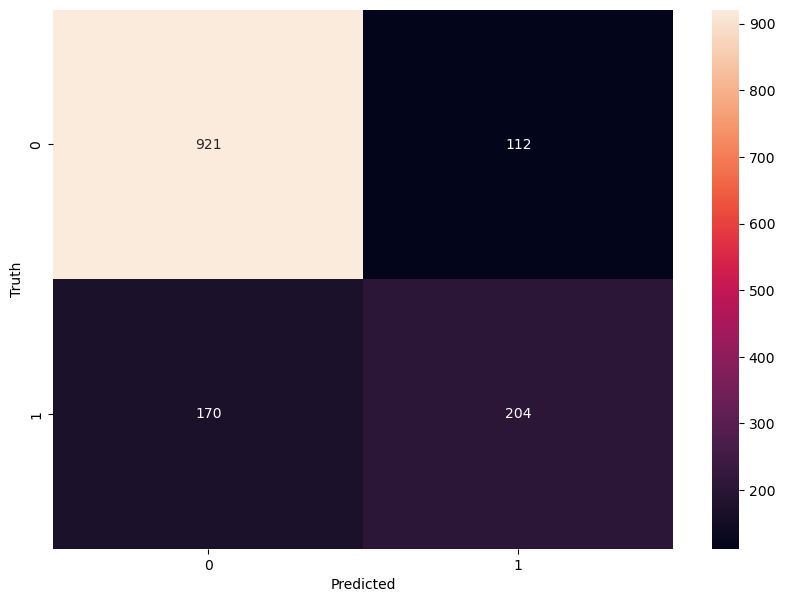

In [1389]:

import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

<h1 align="center">Project 2 Bank Churn Customers Churn Priction</h1>

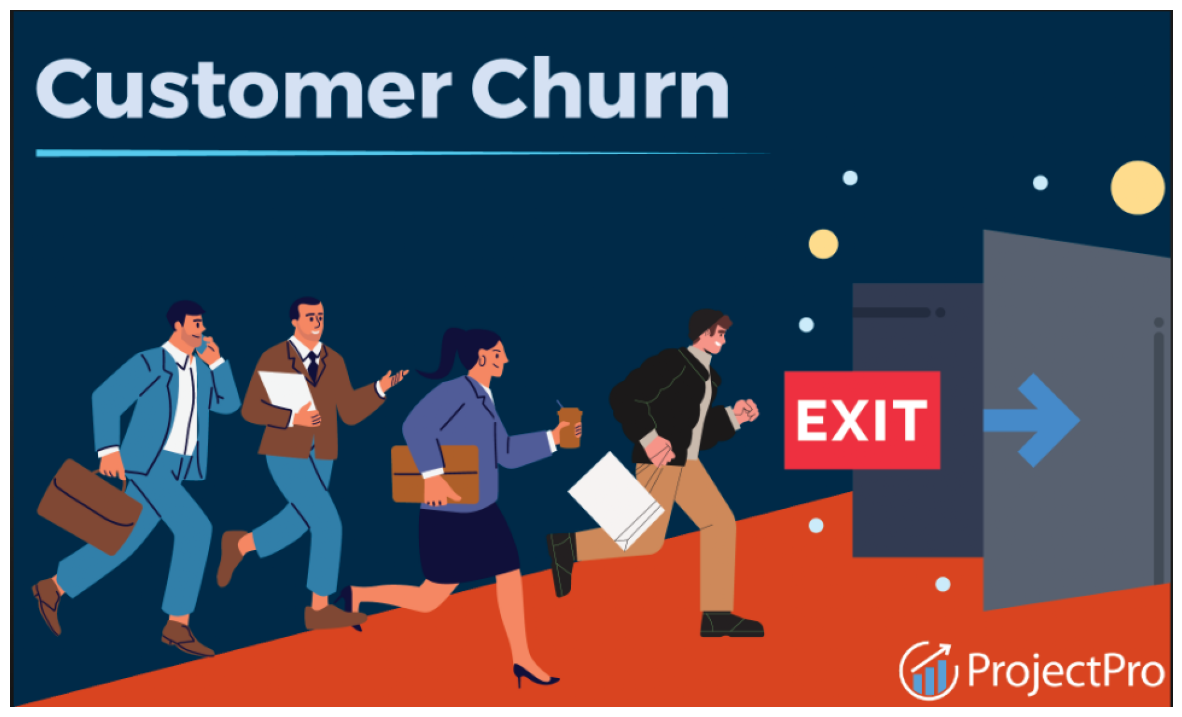

In [1394]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Path to your image file
image_path = '2.png'  # Replace with your actual image path

# Load the image
img = mpimg.imread(image_path)

# Create a figure with a specified size (width, height in inches)
plt.figure(figsize=(15, 12))  # Adjust the size as needed

# Display the image
plt.imshow(img)
plt.axis('off')  # Hide the axes
plt.show()


<h1 align="center">Take this dataset for bank customer churn prediction </h1>

In [1504]:
df=pd.read_csv("Churn_Modelling.csv")

In [1506]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [1508]:
import pandas as pd

In [1510]:
df.drop(df[["CustomerId","Surname"]],axis="columns",inplace=True)

In [1512]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CreditScore      10000 non-null  int64  
 2   Geography        10000 non-null  object 
 3   Gender           10000 non-null  object 
 4   Age              10000 non-null  int64  
 5   Tenure           10000 non-null  int64  
 6   Balance          10000 non-null  float64
 7   NumOfProducts    10000 non-null  int64  
 8   HasCrCard        10000 non-null  int64  
 9   IsActiveMember   10000 non-null  int64  
 10  EstimatedSalary  10000 non-null  float64
 11  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [1514]:
df.replace({"Female":0,"Male":1},inplace =True)

C:\Users\FAST LAPTOP\AppData\Local\Temp\ipykernel_17336\1319071598.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({"Female":0,"Male":1},inplace =True)


In [1516]:
df = pd.get_dummies(data=df, columns=['Geography'])

In [1518]:
df.head(5)

,RowNumber,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,1,619,0,42,2,0.00,1,1,1,101348.88,1,True,False,False
1,2,608,0,41,1,83807.86,1,0,1,112542.58,0,False,False,True
2,3,502,0,42,8,159660.80,3,1,0,113931.57,1,True,False,False
3,4,699,0,39,1,0.00,2,0,0,93826.63,0,True,False,False
4,5,850,0,43,2,125510.82,1,1,1,79084.10,0,False,False,True


In [1520]:
df.drop('RowNumber',axis=1,inplace=True)

In [1522]:
df

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,True,False,False
1,608,0,41,1,83807.86,1,0,1,112542.58,0,False,False,True
2,502,0,42,8,159660.80,3,1,0,113931.57,1,True,False,False
3,699,0,39,1,0.00,2,0,0,93826.63,0,True,False,False
4,850,0,43,2,125510.82,1,1,1,79084.10,0,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,1,39,5,0.00,2,1,0,96270.64,0,True,False,False
9996,516,1,35,10,57369.61,1,1,1,101699.77,0,True,False,False
9997,709,0,36,7,0.00,1,0,1,42085.58,1,True,False,False
9998,772,1,42,3,75075.31,2,1,0,92888.52,1,False,True,False


In [1524]:
df.shape

(10000, 13)

In [1526]:
x=df.drop('Exited',axis=1)
y=df.Exited

In [1528]:
from sklearn.model_selection import train_test_split

In [1530]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

<h1 align="center">Neural Network for Churn Prediction</h1>

In [1533]:
from tensorflow import keras
import tensorflow as tf

In [1535]:
model=keras.Sequential([
    keras.layers.Dense(7,input_shape=(12,),activation="relu"),
    keras.layers.Dense(3,activation="relu"),
    keras.layers.Dense(1,activation="sigmoid")
])
model.compile(
    optimizer='adam',
    loss="binary_crossentropy",
    metrics=['accuracy']
)
# Example of fitting the model (assuming x_train and y_train are defined)
model.fit(x_train, y_train, epochs=3)

Epoch 1/3


C:\Users\FAST LAPTOP\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7932 - loss: 0.6762
Epoch 2/3
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8030 - loss: 0.6166
Epoch 3/3
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8029 - loss: 0.5755


In [1536]:
model.evaluate(x_test,y_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7779 - loss: 0.5685 


[0.5619401335716248, 0.7885000109672546]

In [1537]:
y_pred=model.predict(x_test)
y_pred

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


array([[0.35037804],
       [0.35037804],
       [0.35037804],
       ...,
       [0.35037804],
       [0.35037804],
       [0.35037804]], dtype=float32)

In [1542]:
y_pred=model.predict(x_test)
predicted = []
for i in predicted:
    if i > 0.25:
        predicted.append(1)
    elif i <= 0.25:  
        predicted.append(0)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [1566]:
y=model.predict(x)
predicted = []
for i in predicted:
    if i > 0.25:
        predicted.append(1)
    elif i <= 0.25:  
        predicted.append(0)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [1546]:
from sklearn.metrics import confusion_matrix, classification_report

# Predict probabilities
y_pred = model.predict(x_test)

# Convert probabilities to binary predictions
y_predicted = []
for i in y_pred:
    if i > 0.25:
        y_predicted.append(1)
    else:
        y_predicted.append(0)

# Print classification report
print(classification_report(y_test, y_predicted))


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1577
           1       0.21      1.00      0.35       423

    accuracy                           0.21      2000
   macro avg       0.11      0.50      0.17      2000
weighted avg       0.04      0.21      0.07      2000



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


<h1 align="center">Confusion Matrix to Test Error</h1>

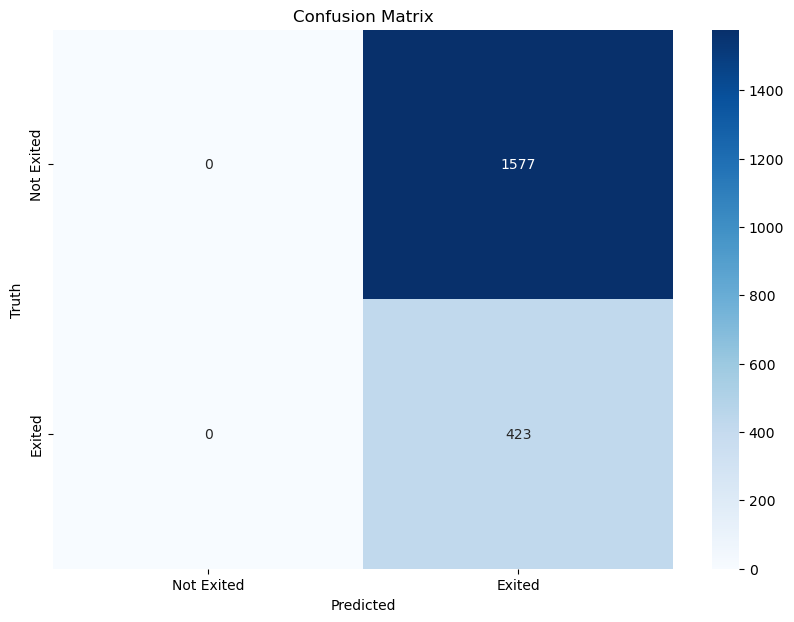

In [1549]:
import seaborn as sn
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

# Compute confusion matrix
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted).numpy()

# Create a heatmap
plt.figure(figsize=(10, 7))
sn.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
           xticklabels=['Not Exited', 'Exited'], 
           yticklabels=['Not Exited', 'Exited'])
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion Matrix')
plt.show()


<h1 align="center">Before Model Fitting Cutomers who Lefted Bank</h1>

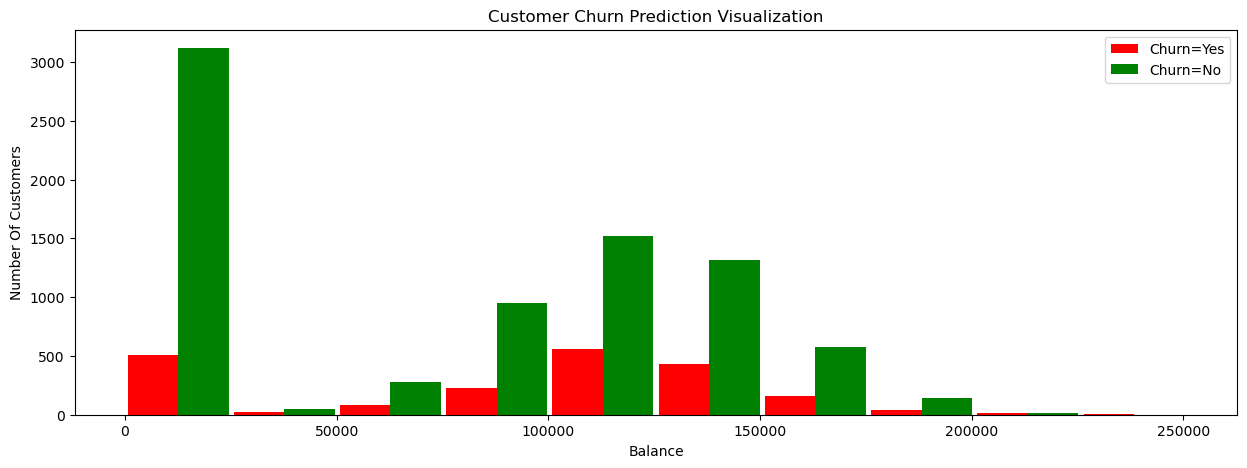

In [1552]:
# Separate the data based on the 'Exited' column
mc_churn_no = df[df.Exited == 0]['Balance'] 
mc_churn_yes = df[df.Exited == 1]['Balance']
plt.figure(figsize=(15,5))
# Plotting the histogram
plt.xlabel("Balance")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualization")

plt.hist([mc_churn_yes, mc_churn_no], rwidth=0.95, color=['red', 'green'], label=['Churn=Yes', 'Churn=No'])
plt.legend()

plt.show()